# Importando as Bibliotecas

In [57]:
# import pandas
import pandas as pd
import seaborn as sn

In [58]:
import spacy

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Conhecendo os dados

In [162]:
df = pd.read_csv(filepath_or_buffer="data/Dataset_5971.csv", sep=",", encoding="latin-1")

In [120]:
display(df)

,LABEL,TEXT,URL,EMAIL,PHONE
0,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...,No,No,No
1,ham,What's up? Do you want me to come online? If y...,No,No,No
2,ham,So u workin overtime nigpun?,No,No,No
3,ham,"Also sir, i sent you an email about how to log...",No,No,No
4,Smishing,Please Stay At Home. To encourage the notion o...,No,No,No
...,...,...,...,...,...
5966,ham,:( but your not here....,No,No,No
5967,ham,Becoz its &lt;#&gt; jan whn al the post ofic...,No,No,No
5968,ham,Its a valentine game. . . send dis msg to all ...,No,No,No
5969,ham,We r outside already.,No,No,No


In [121]:
df.dtypes

LABEL    object
TEXT     object
URL      object
EMAIL    object
PHONE    object
dtype: object

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5971 entries, 0 to 5970
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   LABEL   5971 non-null   object
 1   TEXT    5971 non-null   object
 2   URL     5971 non-null   object
 3   EMAIL   5971 non-null   object
 4   PHONE   5971 non-null   object
dtypes: object(5)
memory usage: 233.4+ KB


In [123]:
df.describe()

,LABEL,TEXT,URL,EMAIL,PHONE
count,5971,5971,5971,5971,5971
unique,5,5949,2,2,2
top,ham,The greatest test of courage on earth is to be...,No,No,No
freq,4844,2,5764,5952,5127


In [124]:
df["LABEL"].unique()

array(['ham', 'Smishing', 'spam', 'Spam', 'smishing'], dtype=object)

In [125]:
df["URL"].unique()

array(['No', 'yes'], dtype=object)

In [126]:
df["EMAIL"].unique()

array(['No', 'yes'], dtype=object)

In [127]:
df["PHONE"].unique()

array(['No', 'yes'], dtype=object)

In [128]:
len([x for x in df.duplicated() if x == True])

17

In [129]:
i = 0
index_dup = []
for x in df.duplicated():
    if x == True:
        index_dup.append(i)
    i += 1

In [130]:
df.iloc[index_dup]

,LABEL,TEXT,URL,EMAIL,PHONE
1352,Smishing,UR GOING 2 BAHAMAS! CallFREEFONE 08081560665 a...,No,No,yes
1804,Smishing,Someone U know has asked our dating service 2 ...,No,No,yes
2963,ham,He remains a bro amongst bros,No,No,No
3692,ham,Reverse is cheating. That is not mathematics.,No,No,No
3874,ham,The sign of maturity is not when we start sayi...,No,No,No
3908,Smishing,U have a secret admirer. REVEAL who thinks U R...,No,No,yes
3909,Smishing,Congrats! 2 mobile 3G Videophones R yours. cal...,No,No,yes
4142,ham,The greatest test of courage on earth is to be...,No,No,No
4731,ham,"Sorry,in meeting I'll call later",No,No,No
4927,Smishing,URGENT!! Your 4* Costa Del Sol Holiday or £500...,No,No,yes


In [131]:
df[df["TEXT"] == "Sorry,in meeting I'll call later"]

,LABEL,TEXT,URL,EMAIL,PHONE
417,ham,"Sorry,in meeting I'll call later",No,No,No
4731,ham,"Sorry,in meeting I'll call later",No,No,No


In [132]:
df[df["TEXT"] == "Arun can u transfr me d amt"]

,LABEL,TEXT,URL,EMAIL,PHONE
415,ham,Arun can u transfr me d amt,No,No,No
5343,ham,Arun can u transfr me d amt,No,No,No


# Transformando os dados

In [133]:
df_transformado = df.copy()

In [134]:
df_transformado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5971 entries, 0 to 5970
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   LABEL   5971 non-null   object
 1   TEXT    5971 non-null   object
 2   URL     5971 non-null   object
 3   EMAIL   5971 non-null   object
 4   PHONE   5971 non-null   object
dtypes: object(5)
memory usage: 233.4+ KB


In [135]:
df_transformado["LABEL"].unique()

array(['ham', 'Smishing', 'spam', 'Spam', 'smishing'], dtype=object)

In [136]:
df_transformado["LABEL"].replace("Spam", "spam", inplace=True)
df_transformado["LABEL"].replace("Smishing", "smishing", inplace=True)
df_transformado["LABEL"].replace(["ham", "spam", "smishing"], [-1, 0, 1], inplace=True)

In [137]:
df_transformado["URL"].replace(["No", "yes"], [0, 1], inplace=True)
df_transformado["EMAIL"].replace(["No", "yes"], [0, 1], inplace=True)
df_transformado["PHONE"].replace(["No", "yes"], [0, 1], inplace=True)

In [138]:
display(df_transformado["URL"].unique())
display(df_transformado["EMAIL"].unique())
display(df_transformado["PHONE"].unique())

array([0, 1])

array([0, 1])

array([0, 1])

In [139]:
len([x for x in df_transformado.duplicated() if x == True]) ## Ele aumenta por causa do tratamento que se fez para as palvras minusculas

19

In [140]:
df_transformado.drop_duplicates(inplace=True)

In [141]:
display(len(df_transformado))
display(len(df))

display(len(df) - len(df_transformado))

5952

5971

19

In [142]:
df_transformado.reset_index(drop=True, inplace=True)

In [143]:
display(df.head())
display(df_transformado.head())

,LABEL,TEXT,URL,EMAIL,PHONE
0,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...,No,No,No
1,ham,What's up? Do you want me to come online? If y...,No,No,No
2,ham,So u workin overtime nigpun?,No,No,No
3,ham,"Also sir, i sent you an email about how to log...",No,No,No
4,Smishing,Please Stay At Home. To encourage the notion o...,No,No,No


,LABEL,TEXT,URL,EMAIL,PHONE
0,-1,Your opinion about me? 1. Over 2. Jada 3. Kusr...,0,0,0
1,-1,What's up? Do you want me to come online? If y...,0,0,0
2,-1,So u workin overtime nigpun?,0,0,0
3,-1,"Also sir, i sent you an email about how to log...",0,0,0
4,1,Please Stay At Home. To encourage the notion o...,0,0,0


# Analisando os dados

<Axes: xlabel='LABEL', ylabel='count'>

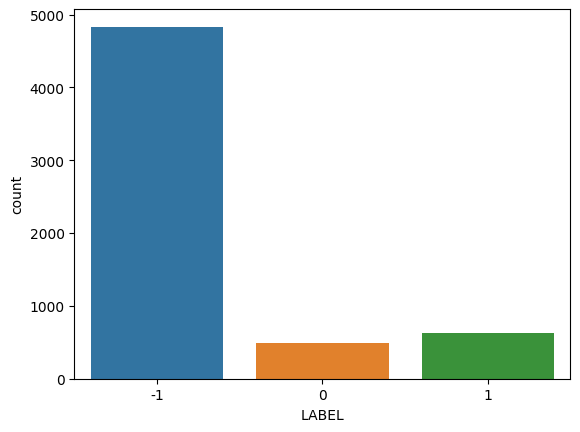

In [144]:
sn.countplot(df_transformado, x="LABEL")

In [145]:
display(len(df_transformado[df_transformado["LABEL"] == -1]))
display(len(df_transformado[df_transformado["LABEL"] == 0]))
display(len(df_transformado[df_transformado["LABEL"] == 1]))

4834

489

629

# NLP

#### 1500 para treino e o resto para validação

In [146]:
nlp = spacy.load("en_core_web_trf")

In [147]:
df_teste = df_transformado.iloc[:1500].copy()
df_validacao = df_transformado.iloc[1500:].copy()

In [148]:
display(df_teste)
display(df_validacao)

,LABEL,TEXT,URL,EMAIL,PHONE
0,-1,Your opinion about me? 1. Over 2. Jada 3. Kusr...,0,0,0
1,-1,What's up? Do you want me to come online? If y...,0,0,0
2,-1,So u workin overtime nigpun?,0,0,0
3,-1,"Also sir, i sent you an email about how to log...",0,0,0
4,1,Please Stay At Home. To encourage the notion o...,0,0,0
...,...,...,...,...,...
1495,0,EASTENDERS TV Quiz. What FLOWER does DOT compa...,0,0,1
1496,-1,"Ya, i'm referin to mei's ex wat... No ah, wait...",0,0,0
1497,-1,"Bloody hell, cant believe you forgot my surnam...",0,0,0
1498,-1,Don no da:)whats you plan? Let mw know�,0,0,0


,LABEL,TEXT,URL,EMAIL,PHONE
1500,-1,I gotta collect da car at 6 lei.,0,0,0
1501,-1,Hey... Thk we juz go accordin to wat we discus...,0,0,0
1502,-1,Ya it came a while ago,0,0,0
1503,-1,Appt is at &lt;TIME&gt; am. Not my fault u don...,0,0,0
1504,-1,For many things its an antibiotic and it can b...,0,0,0
...,...,...,...,...,...
5947,-1,I'm in class. Did you get my text.,0,0,0
5948,-1,:( but your not here....,0,0,0
5949,-1,Becoz its &lt;#&gt; jan whn al the post ofic...,0,0,0
5950,-1,Its a valentine game. . . send dis msg to all ...,0,0,0


In [149]:
def pre_processamento(text):
    doc = nlp(text)
    texto_processado = " ".join([token.lemma_ for token in doc if not token.is_punct and not token.is_stop]) # Separar mais as coisas
    return texto_processado

In [150]:
df_teste["PROCESSED_TEXT"] = df_teste["TEXT"].apply(pre_processamento)

In [151]:
df_teste.head()

,LABEL,TEXT,URL,EMAIL,PHONE,PROCESSED_TEXT
0,-1,Your opinion about me? 1. Over 2. Jada 3. Kusr...,0,0,0,opinion 1 2 Jada 3 Kusruthi 4 lovable 5 silent...
1,-1,What's up? Do you want me to come online? If y...,0,0,0,want come online free talk �
2,-1,So u workin overtime nigpun?,0,0,0,u workin overtime nigpun
3,-1,"Also sir, i sent you an email about how to log...",0,0,0,sir send email log usc payment portal i.ll sen...
4,1,Please Stay At Home. To encourage the notion o...,0,0,0,stay home encourage notion stay home tax pay c...


In [152]:
# TODO: Melhorar alguns lemmas, colocar stemm, retirar os caracteres especiais
display(df_teste["PROCESSED_TEXT"].iloc[1])
display(df_teste["TEXT"].iloc[1])

'want come online free talk �'

"What's up? Do you want me to come online? If you are free we can talk sometime�"

In [153]:
x = df_teste["PROCESSED_TEXT"]
y = df_teste["LABEL"]

In [154]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [155]:
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

In [156]:
model = LogisticRegression()
model.fit(x_train_tfidf, y_train)

LogisticRegression()

In [157]:
y_pred = model.predict(x_test_tfidf)

In [158]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")

Acurácia do modelo: 0.90
